In [1]:
import jax.numpy as jnp
import jax.random as jrandom

import matplotlib.pyplot as plt
import pandas as pd
from jax import jit, grad, jacfwd, jacrev



from scipy.stats import linregress

from tqdm import tqdm
import pickle

import numpy as np

from jax.config import config
config.update("jax_enable_x64", True)

import matplotlib.pyplot as plt

import os

%matplotlib inline
plt.rcParams['figure.figsize'] = [12,12]
plt.style.use('ggplot')
plt.rcParams['lines.markersize'] = 8
plt.rcParams.update({'font.size': 12})

In [2]:
def load_opt(opt_type, test_problem_name, sig, noise_type, c1, c2, seed):
    save_name = "{}_{}_{}_{}_{}".format(noise_type, sig, c1, c2, seed)
    save_dir_path = "../exact_sampling/OptimizationResults/{}/{}".format(opt_type, test_problem_name)
    if os.path.exists(save_dir_path + "/" + save_name + ".pkl"):
        
        with open(save_dir_path + "/" + save_name + ".pkl", "rb") as f:
            d = pickle.load(f)
    elif os.path.exists(save_dir_path + "/" + save_name):
        
        with open(save_dir_path + "/" + save_name, "rb") as f:
            d = pickle.load(f)
    else:
        d = None
    return d

In [3]:
adapt_functions = ["AIRCRFTB", "ALLINITU", "ARWHEAD", "BARD", "BDQRTIC", "BIGGS3", "BIGGS5", "BIGGS6", "BOX2", "BOX3", "BRKMCC", "BROWNAL", "BROWNDEN", "CLIFF", "CRAGGLVY", "CUBE", "DENSCHND", "DENSCHNE", "DIXMAANH", "DQRTIC", "EDENSCH", "EIGENALS", "EIGENBLS", "EIGENCLS", "ENGVAL1", "EXPFIT", "FLETCBV3", "FLETCHBV", "FREUROTH", "GENROSE", "GULF", "HAIRY", "HELIX", "NCB20B", "NONDIA", "NONDQUAR", "OSBORNEA", "OSBORNEB", "PENALTY1", "PFIT1LS", "PFIT2LS", "PFIT3LS", "PFIT4LS", "QUARTC", "SINEVAL", "SINQUAD", "SISSER", "SPARSQUR", "TOINTGSS", "TQUARTIC", "TRIDIA", "WATSON", "WOODS", "ZANGWIL"]


0
AIRCRFTB


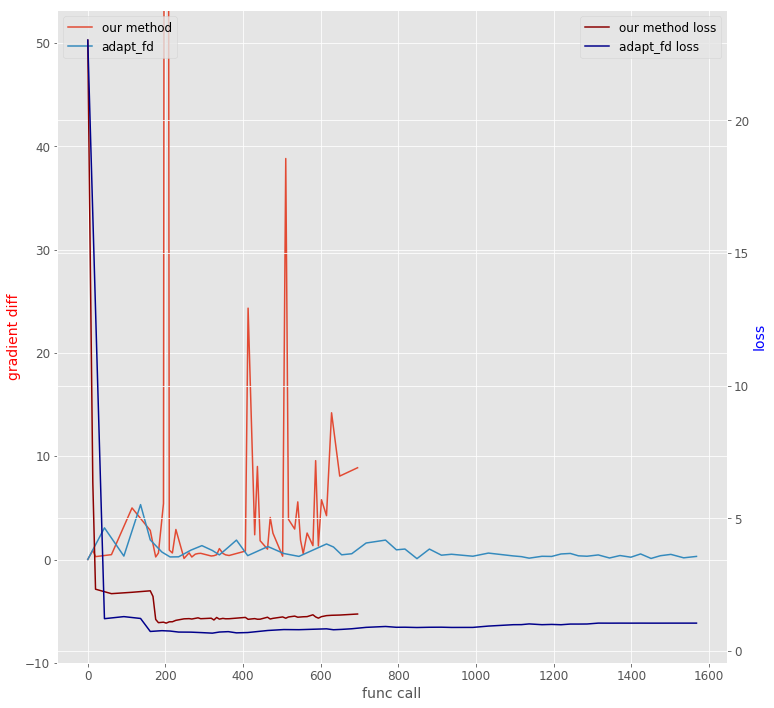

1
ALLINITU


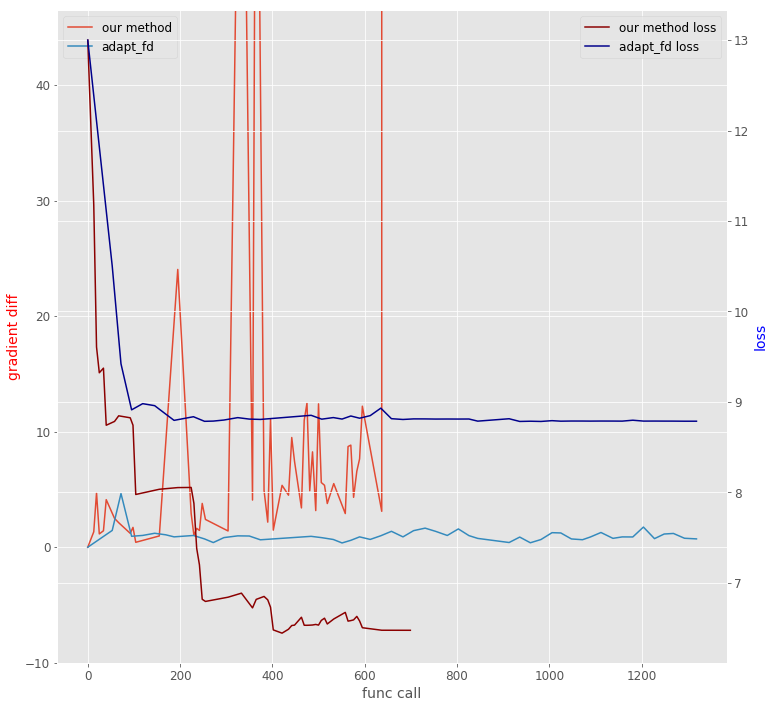

2
ARWHEAD


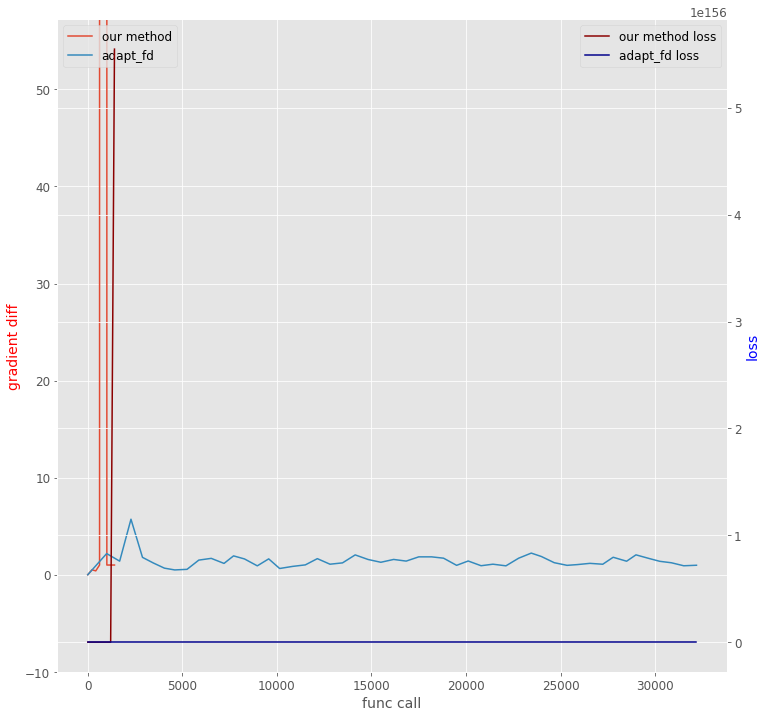

3
BARD


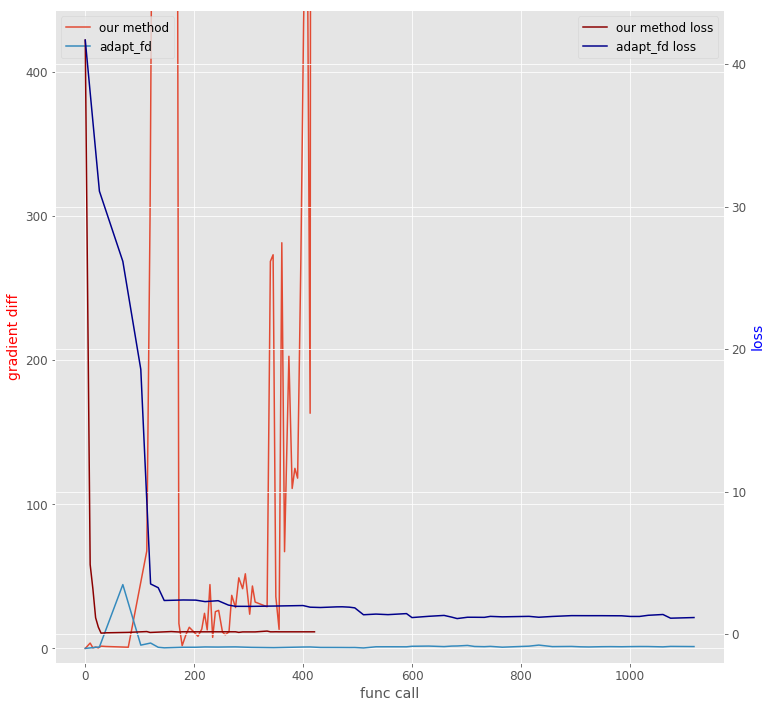

4
BDQRTIC


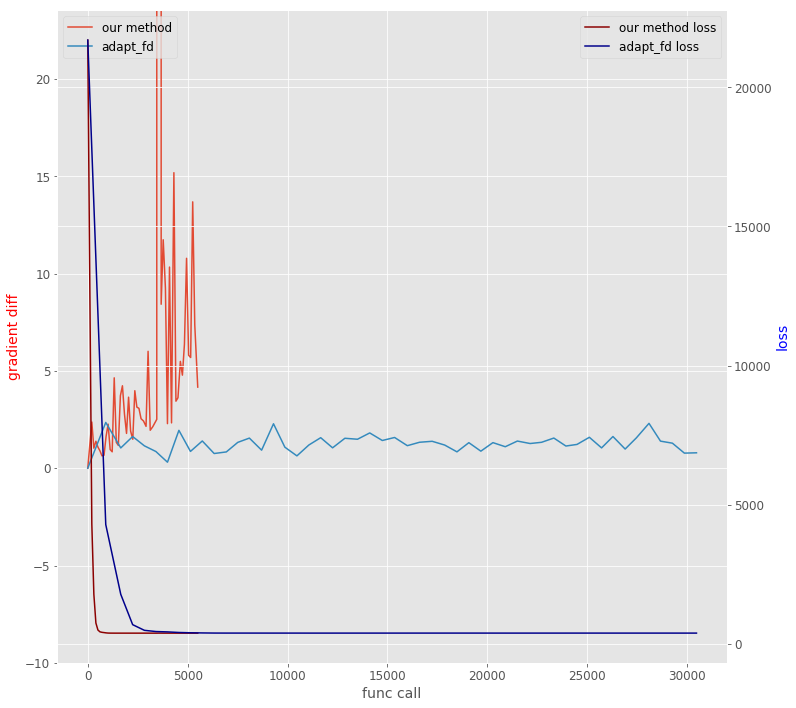

5
BIGGS3


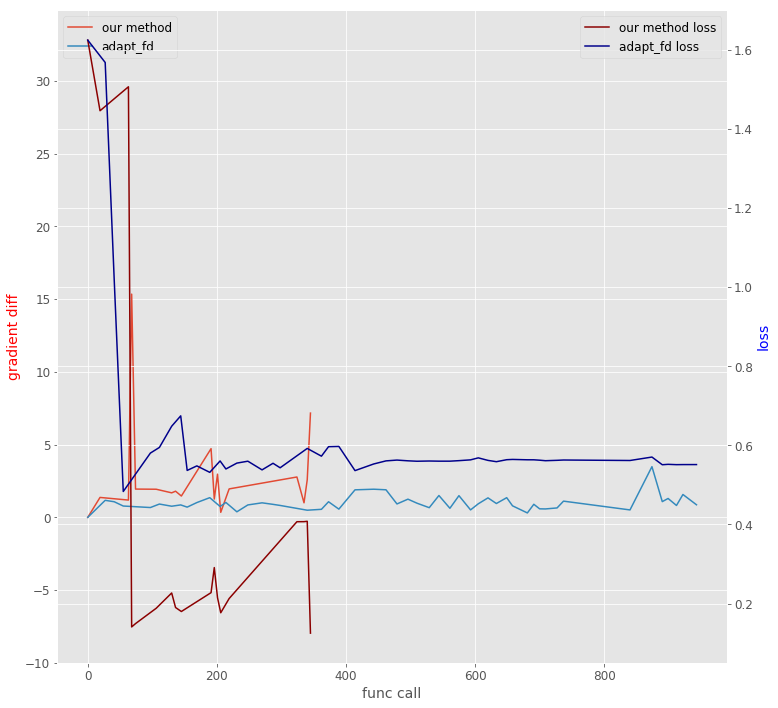

6
BIGGS5


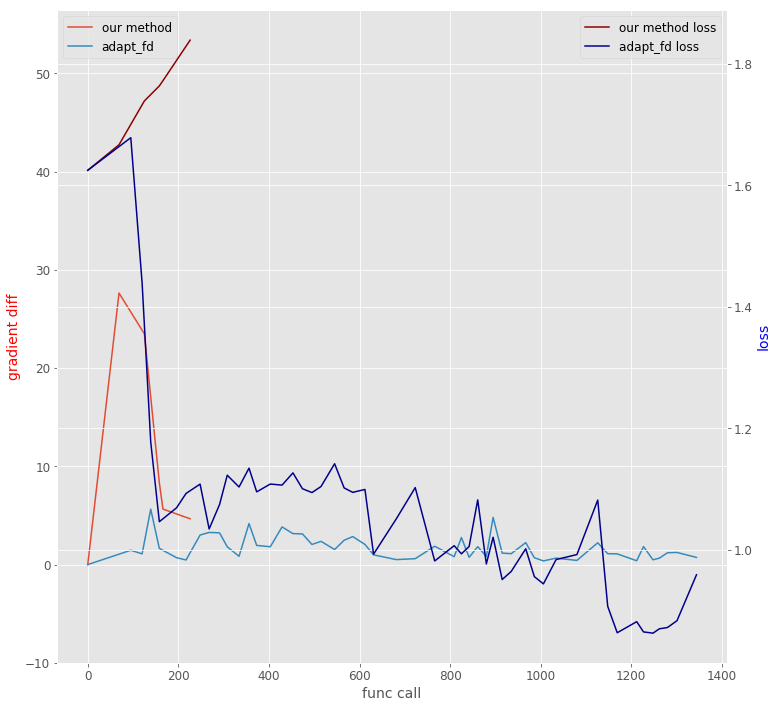

7
BIGGS6


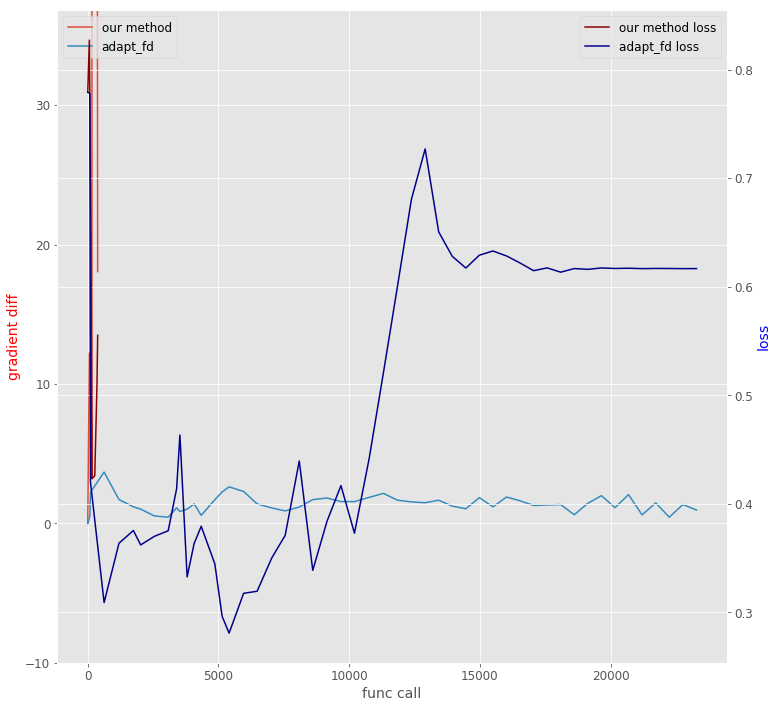

8
BOX2


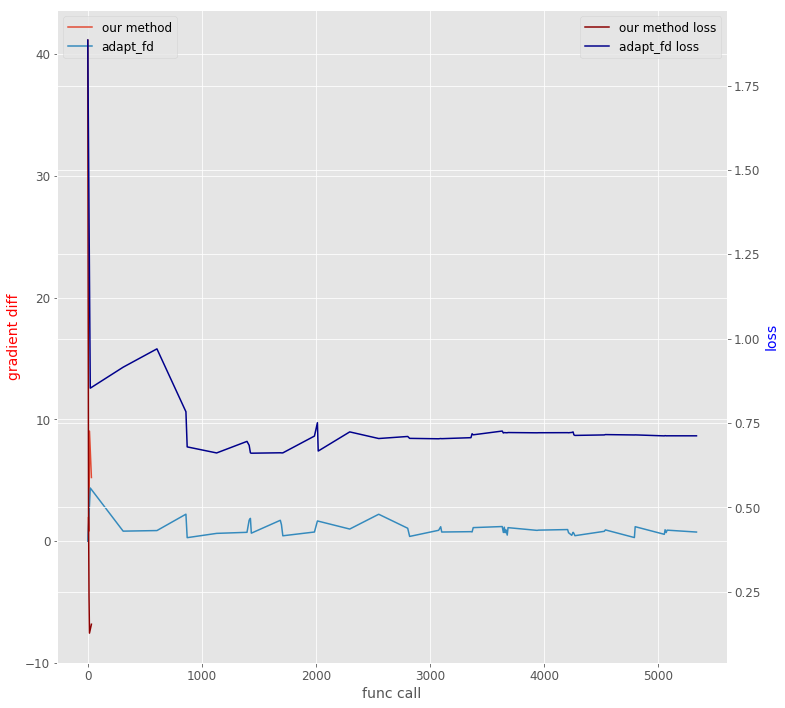

9
BOX3


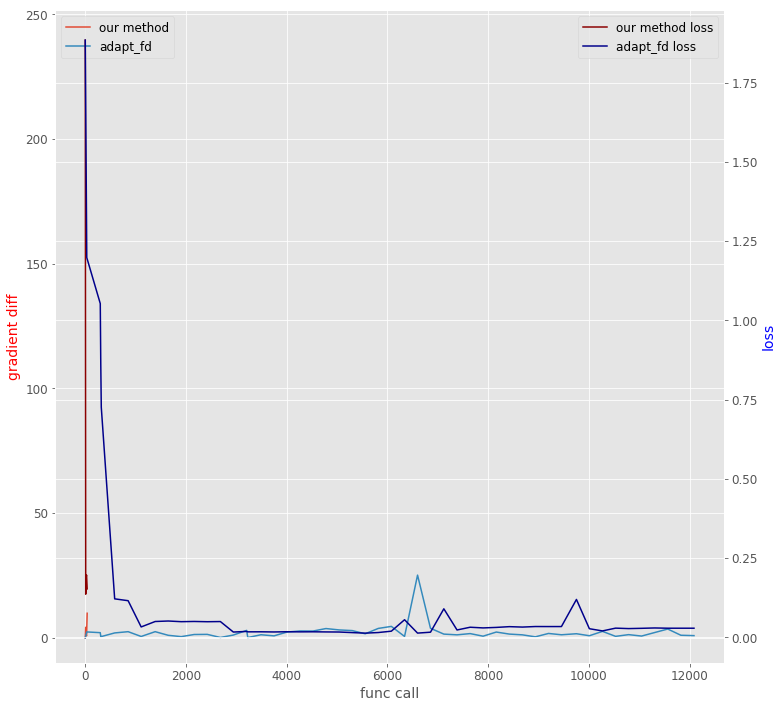

10
BRKMCC


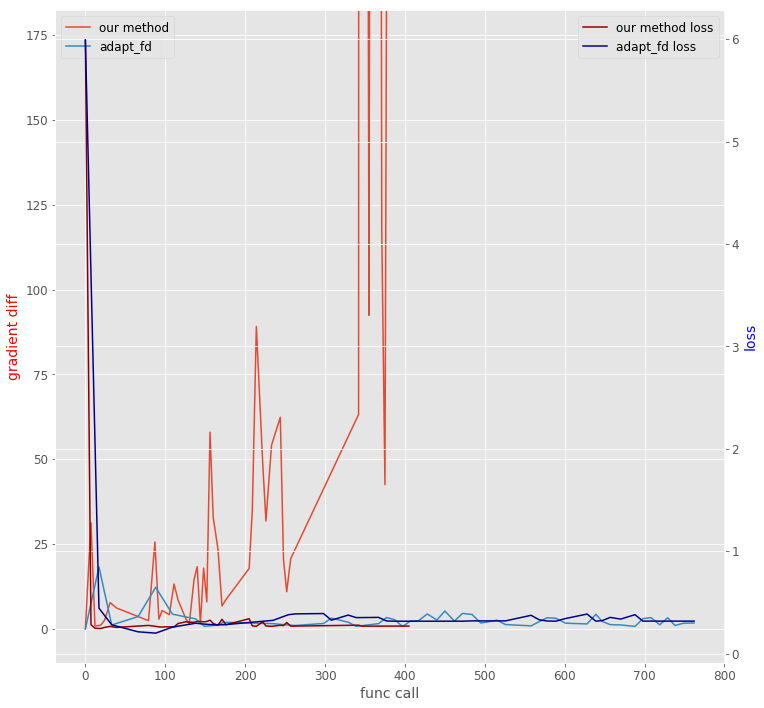

11
BROWNAL
Not found results for BROWNAL.
12
BROWNDEN


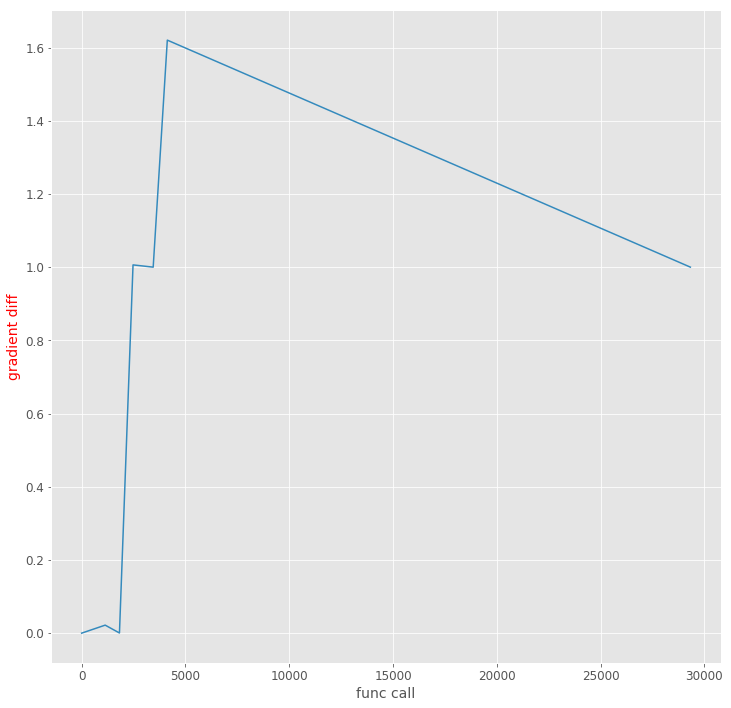

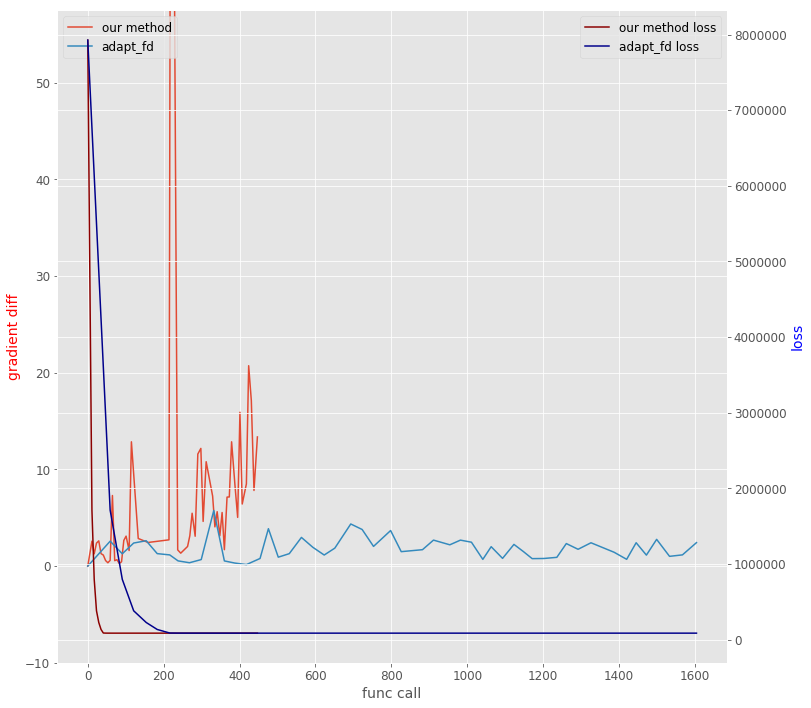

13
CLIFF


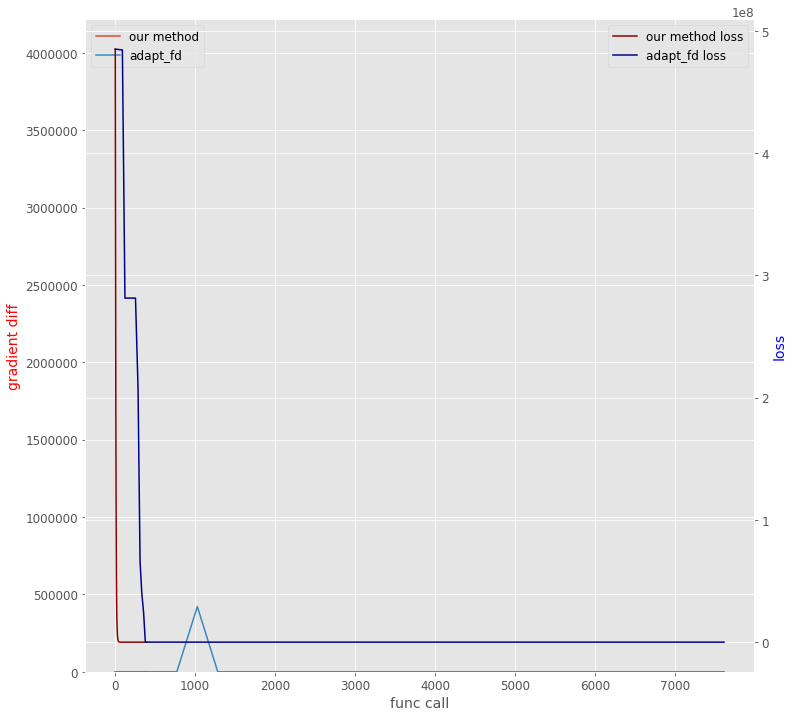

14
CRAGGLVY
Not found results for CRAGGLVY.
15
CUBE
Not found results for CUBE.
16
DENSCHND
Not found results for DENSCHND.
17
DENSCHNE
Not found results for DENSCHNE.
18
DIXMAANH
Not found results for DIXMAANH.
19
DQRTIC
Not found results for DQRTIC.
20
EDENSCH
Not found results for EDENSCH.
21
EIGENALS
Not found results for EIGENALS.
22
EIGENBLS
Not found results for EIGENBLS.
23
EIGENCLS
Not found results for EIGENCLS.
24
ENGVAL1
Not found results for ENGVAL1.
25
EXPFIT
Not found results for EXPFIT.
26
FLETCBV3
Not found results for FLETCBV3.
27
FLETCHBV
Not found results for FLETCHBV.
28
FREUROTH
Not found results for FREUROTH.
29
GENROSE
Not found results for GENROSE.
30
GULF
Not found results for GULF.
31
HAIRY
Not found results for HAIRY.
32
HELIX
Not found results for HELIX.
33
NCB20B
Not found results for NCB20B.
34
NONDIA
Not found results for NONDIA.
35
NONDQUAR
Not found results for NONDQUAR.
36
OSBORNEA
Not found results for OSBORNEA.
37
OSBORNEB
Not found results for OSBO

/Users/daniellengyel/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Not found results for WATSON.
52
WOODS
Not found results for WOODS.
53
ZANGWIL
Not found results for ZANGWIL.


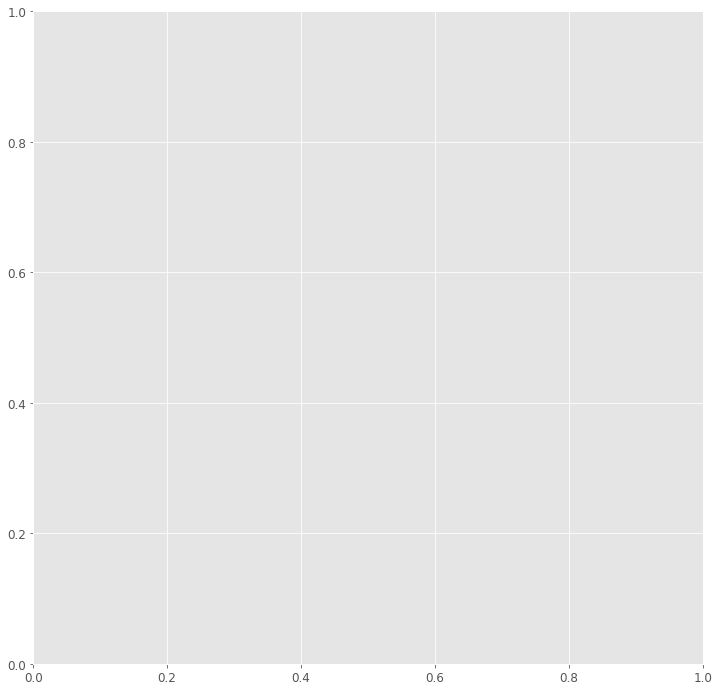

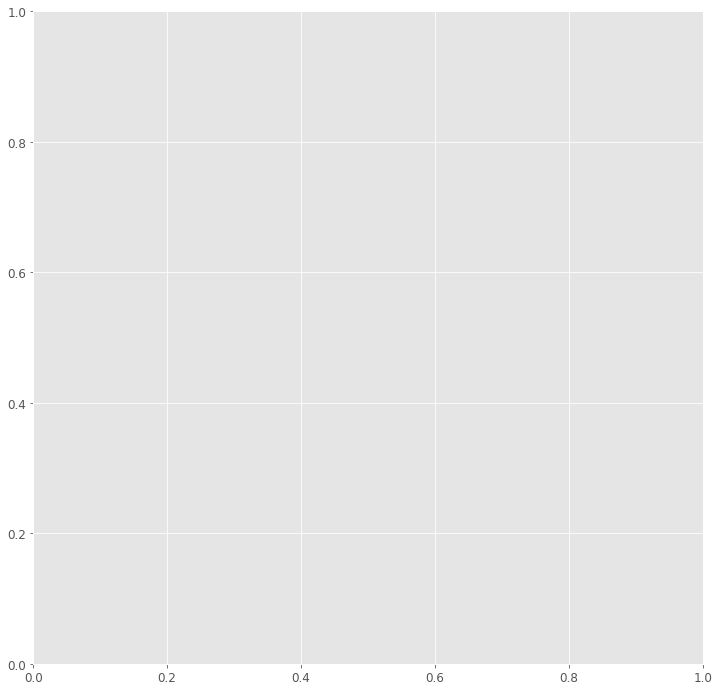

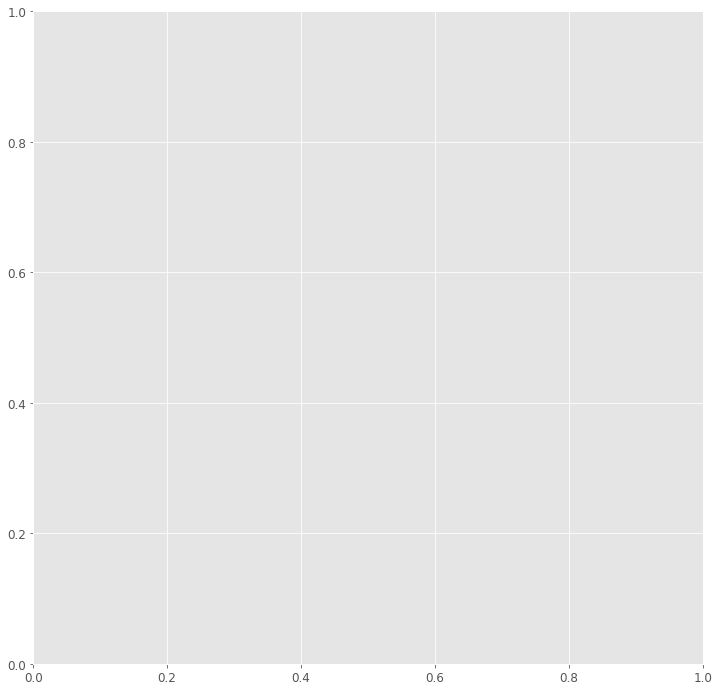

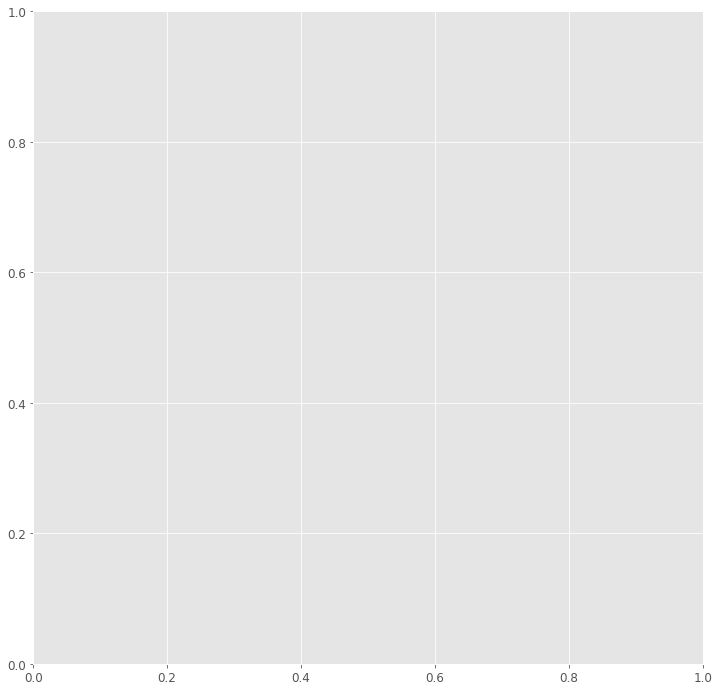

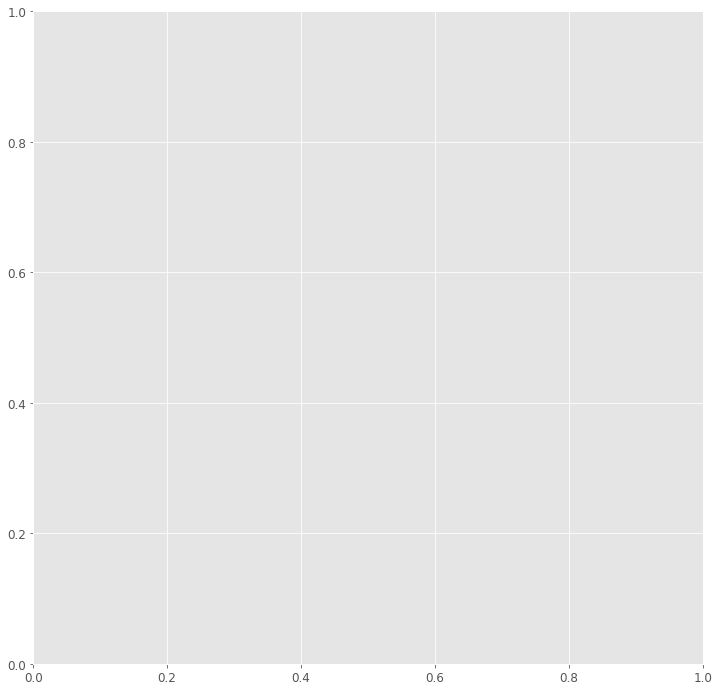

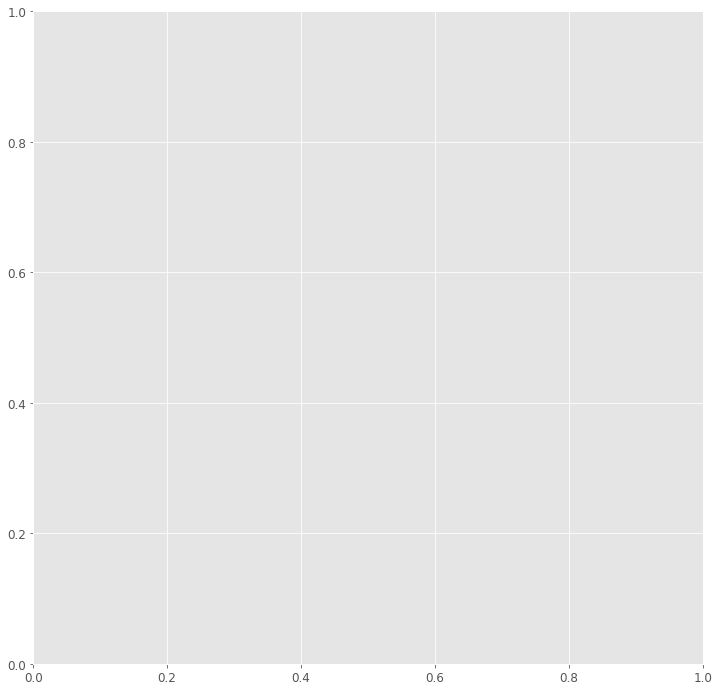

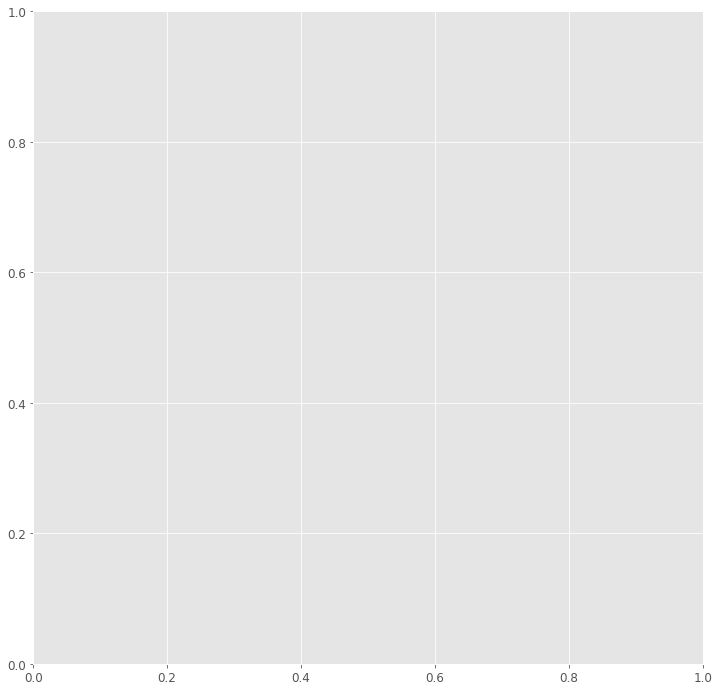

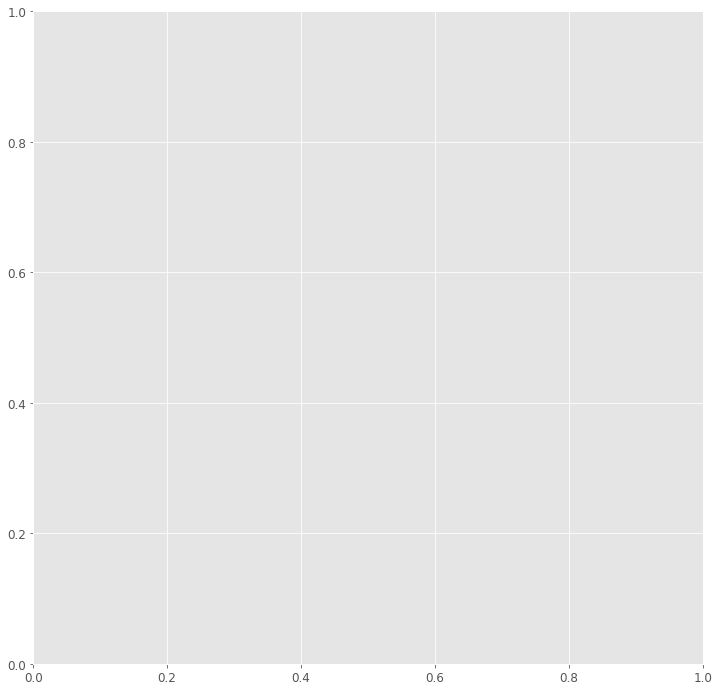

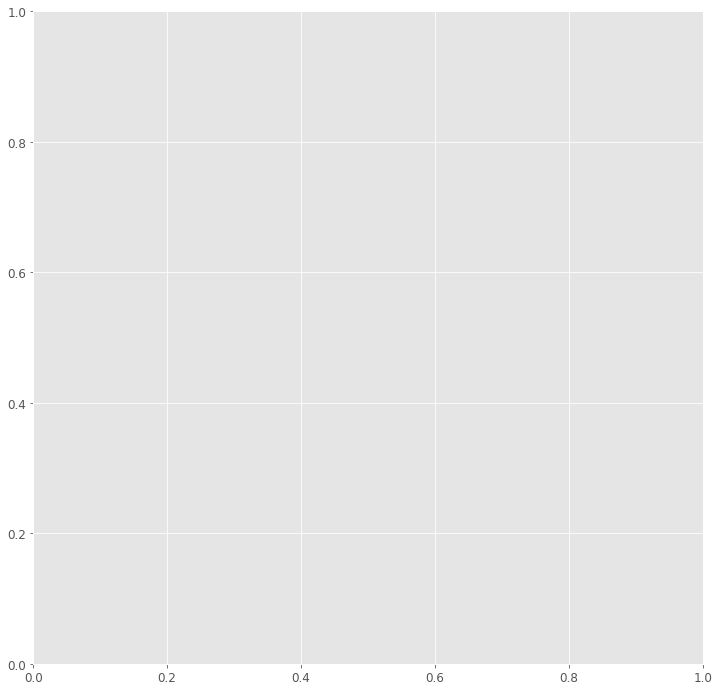

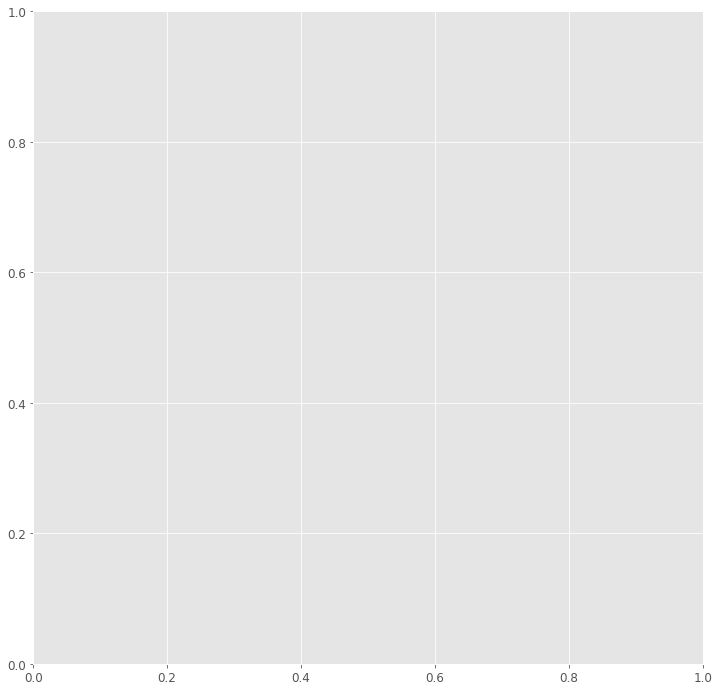

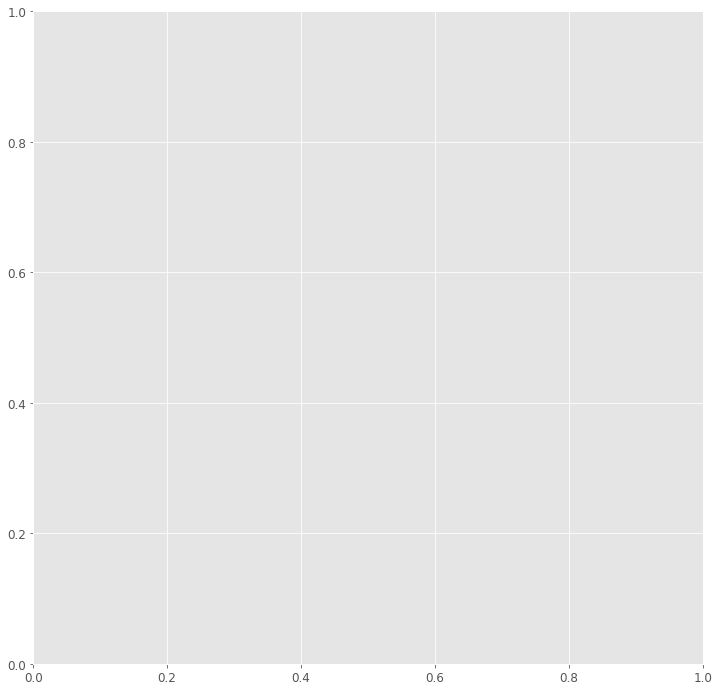

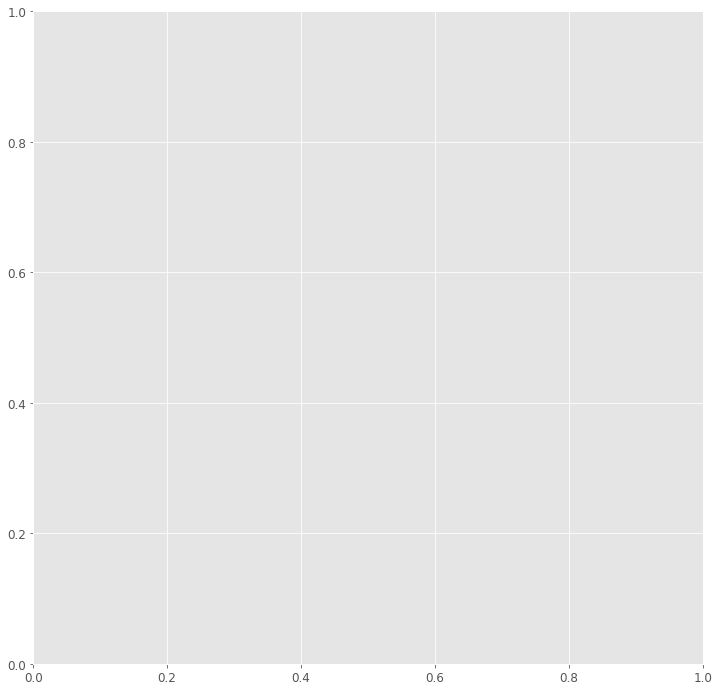

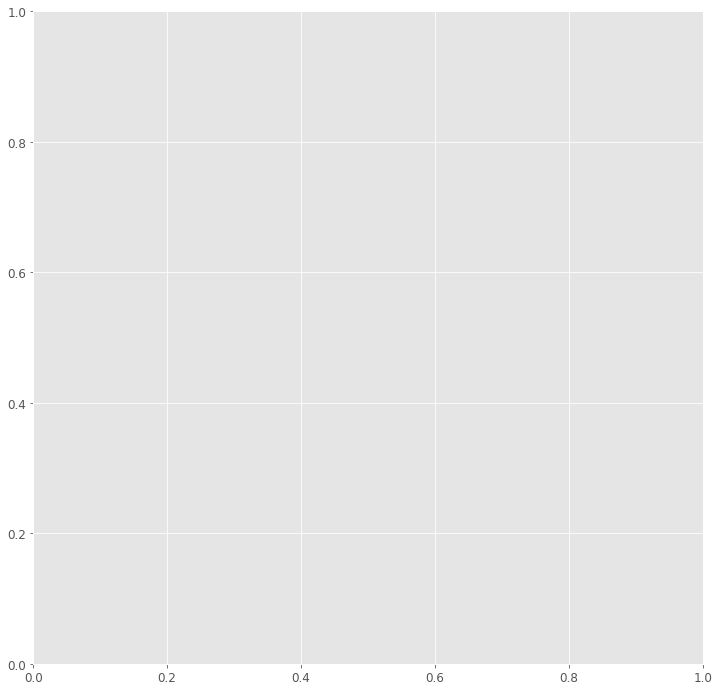

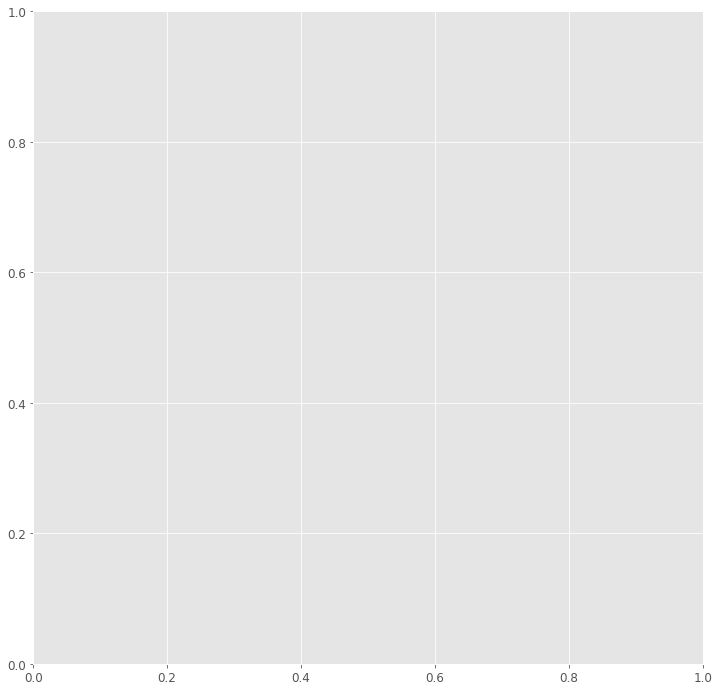

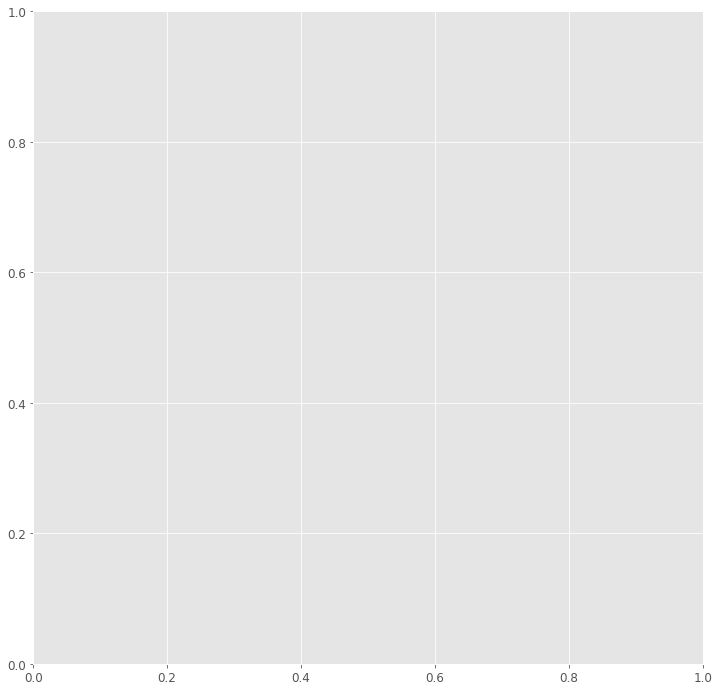

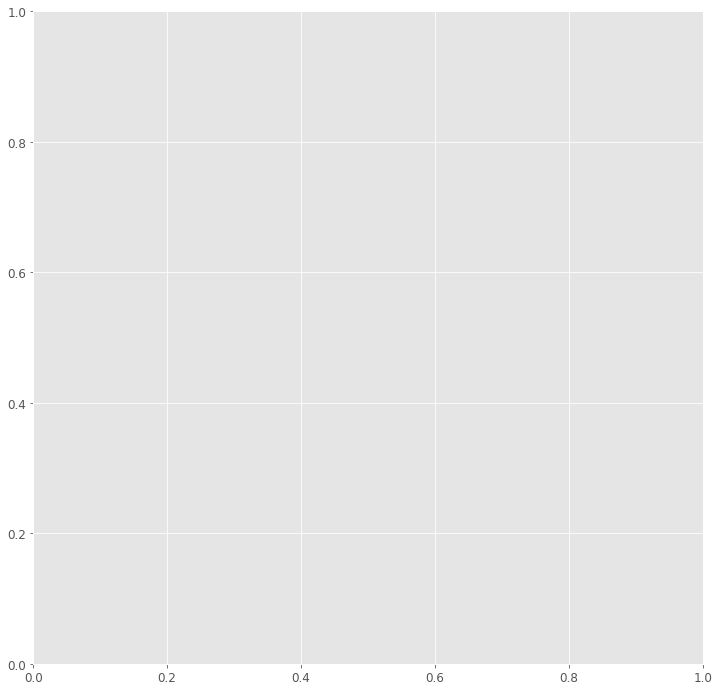

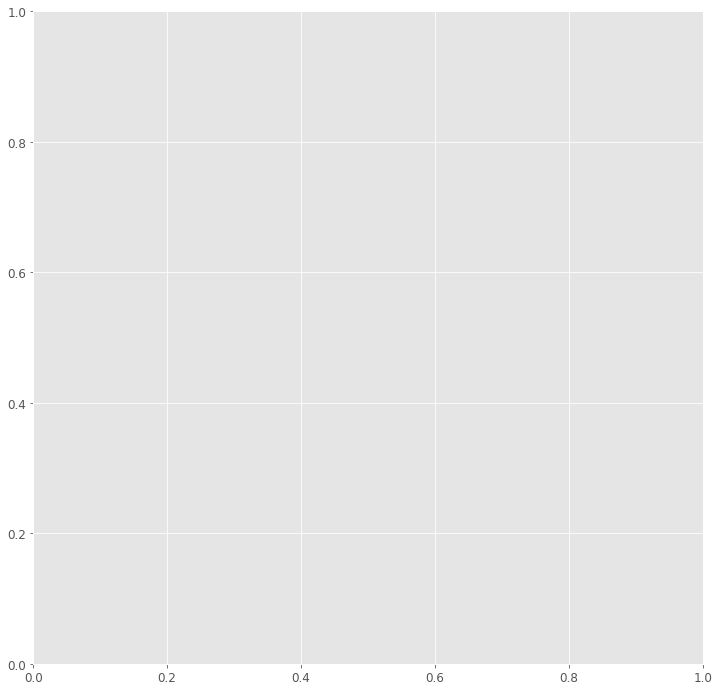

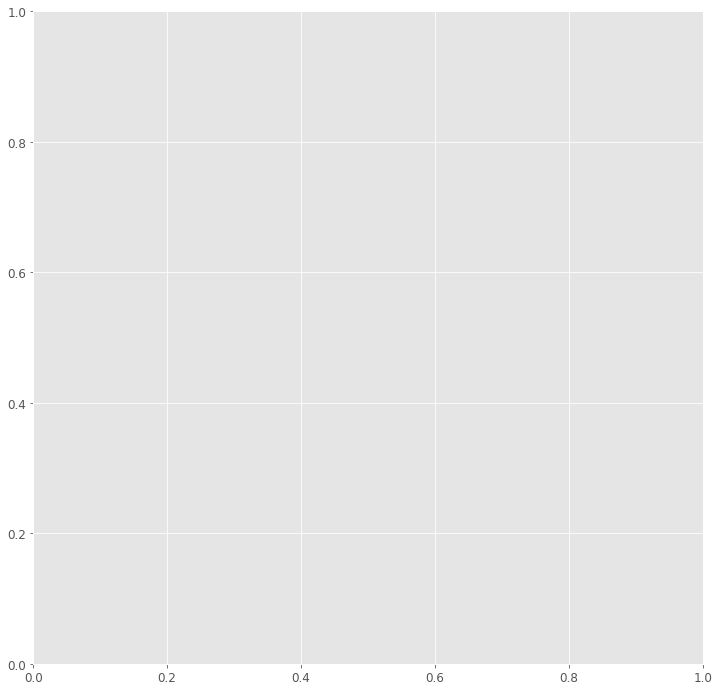

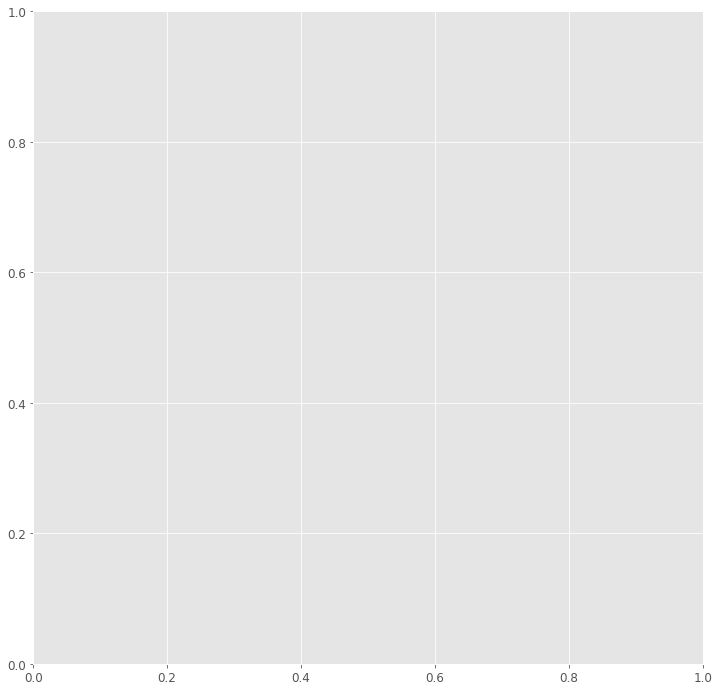

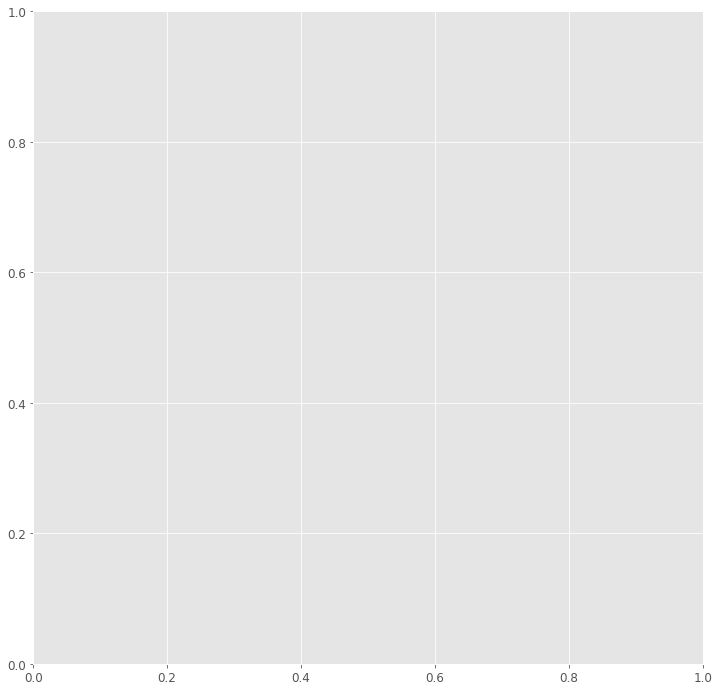

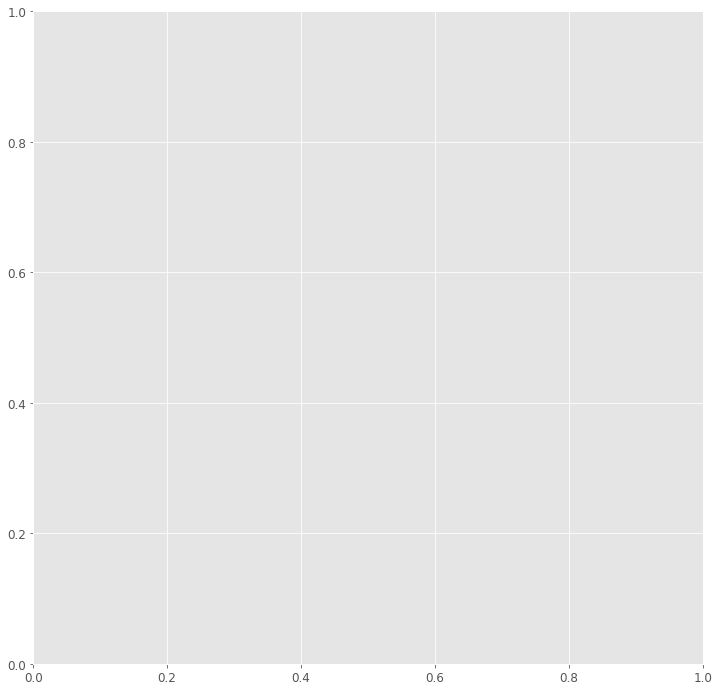

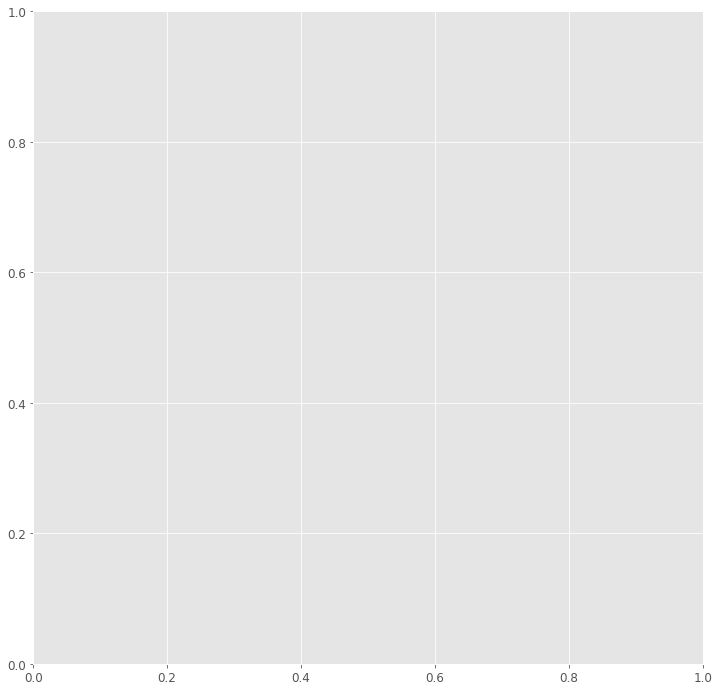

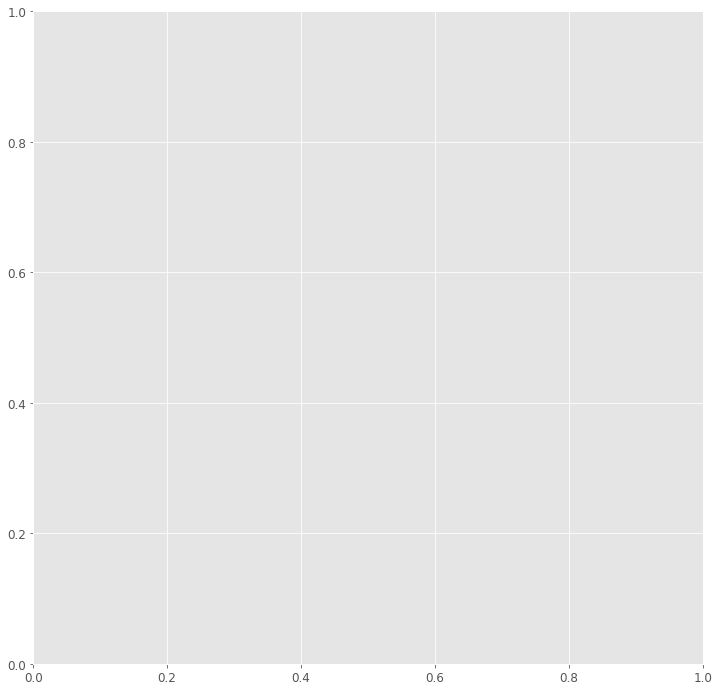

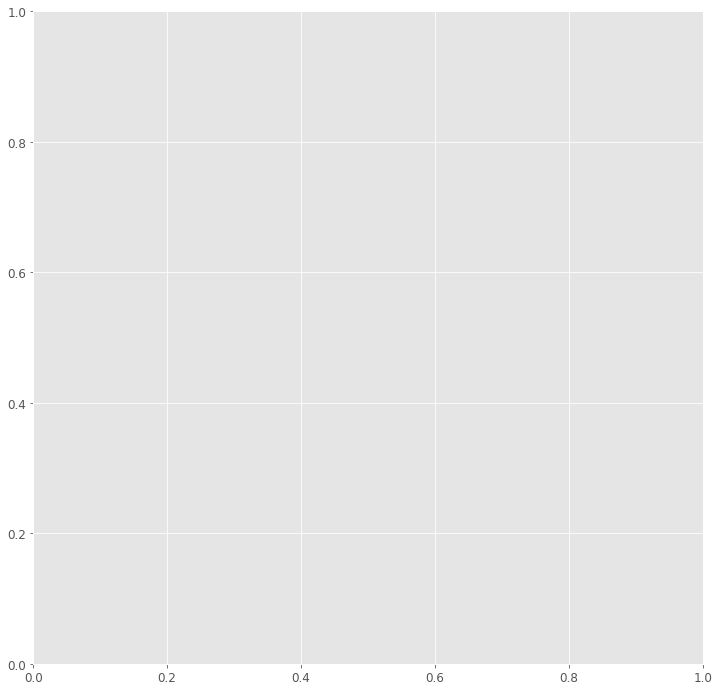

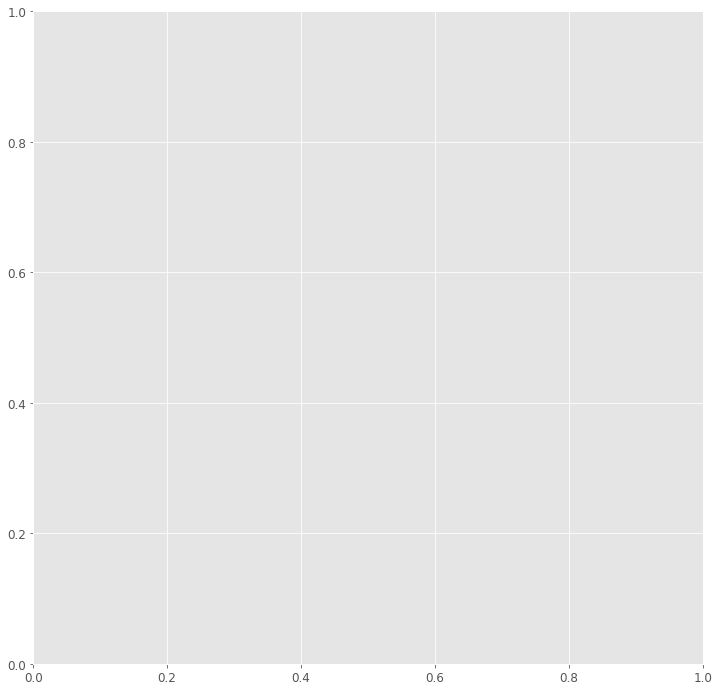

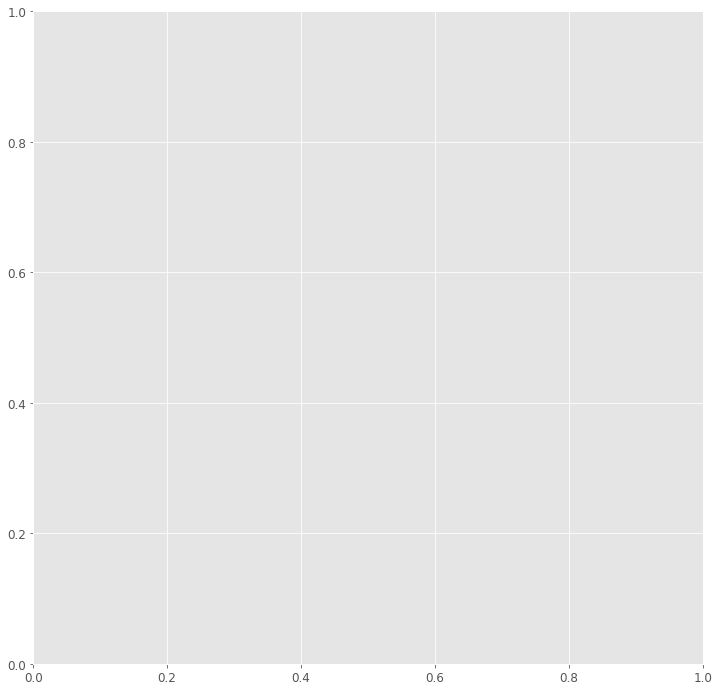

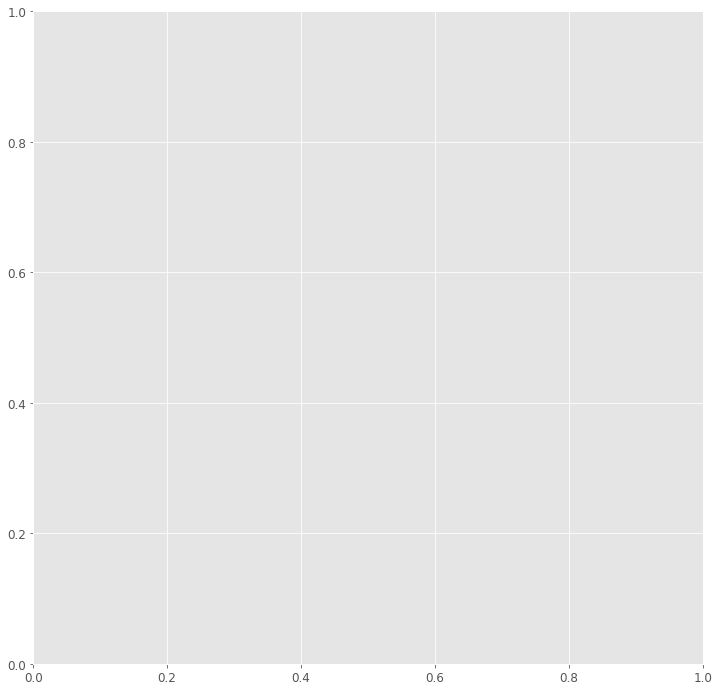

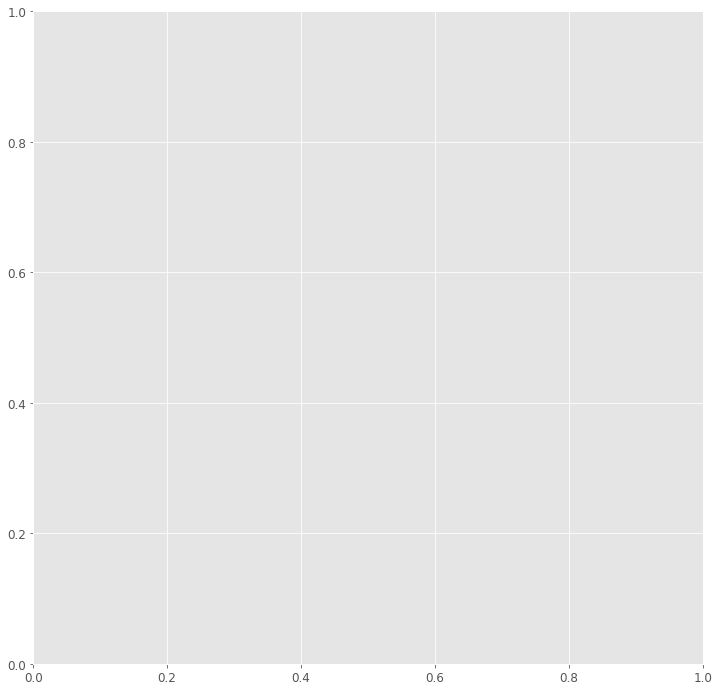

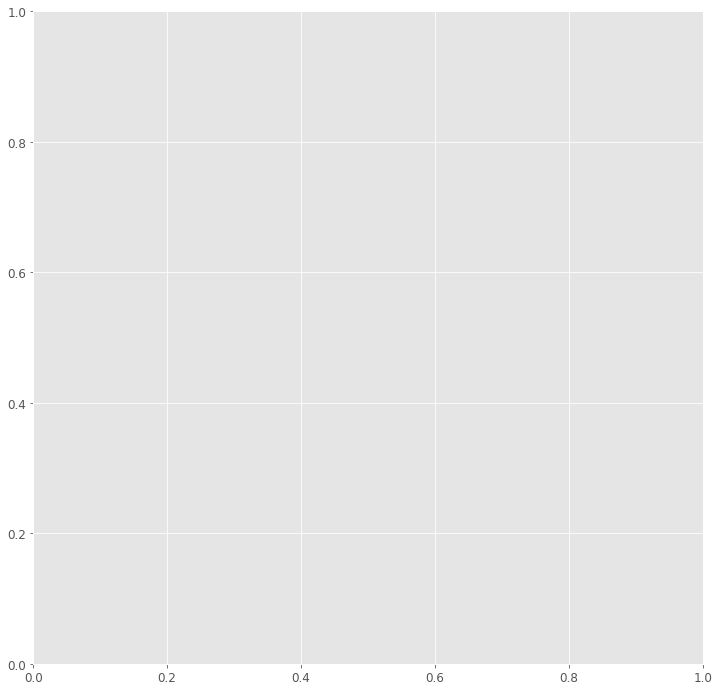

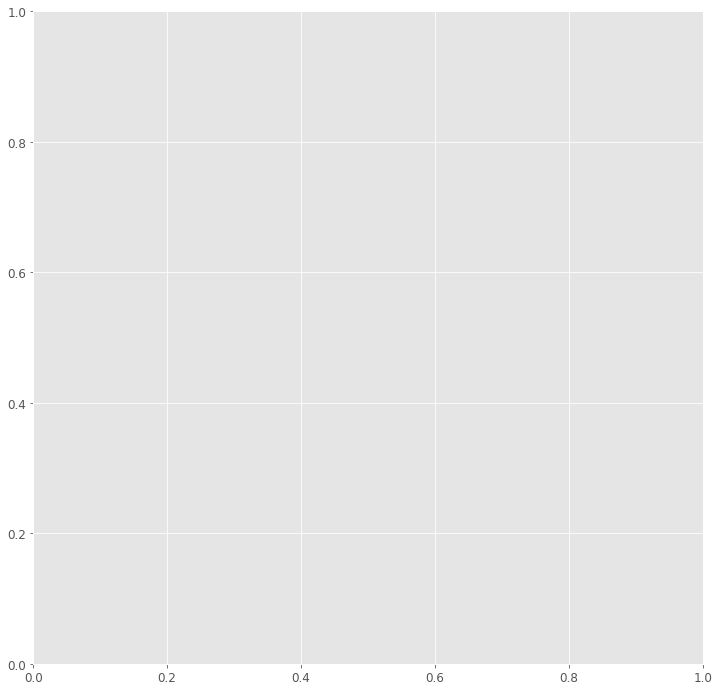

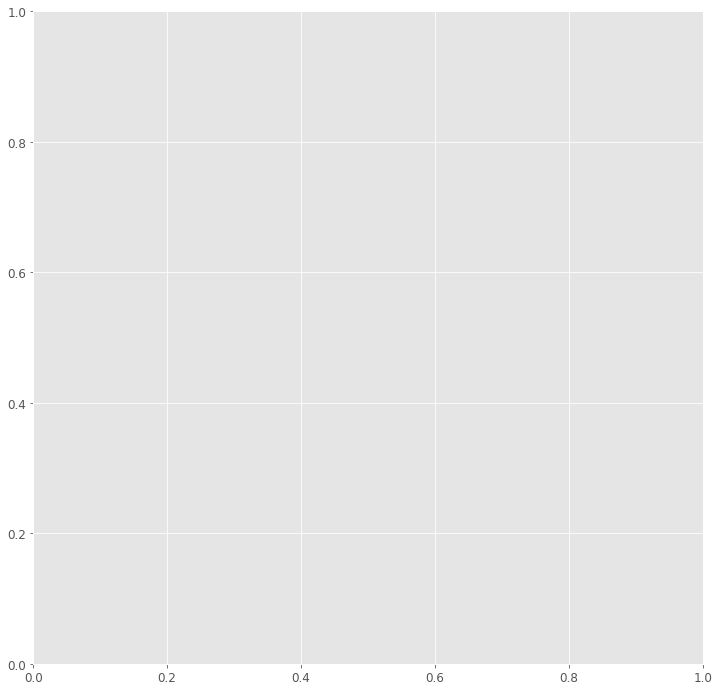

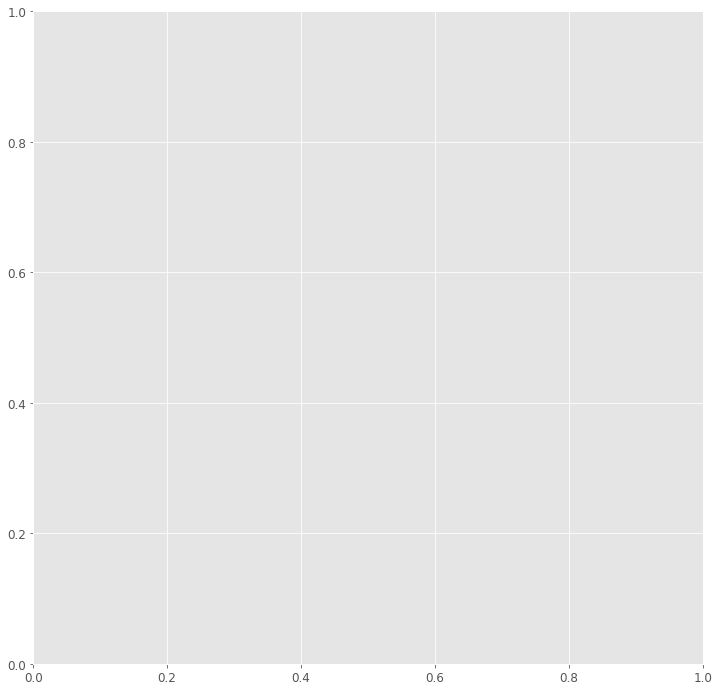

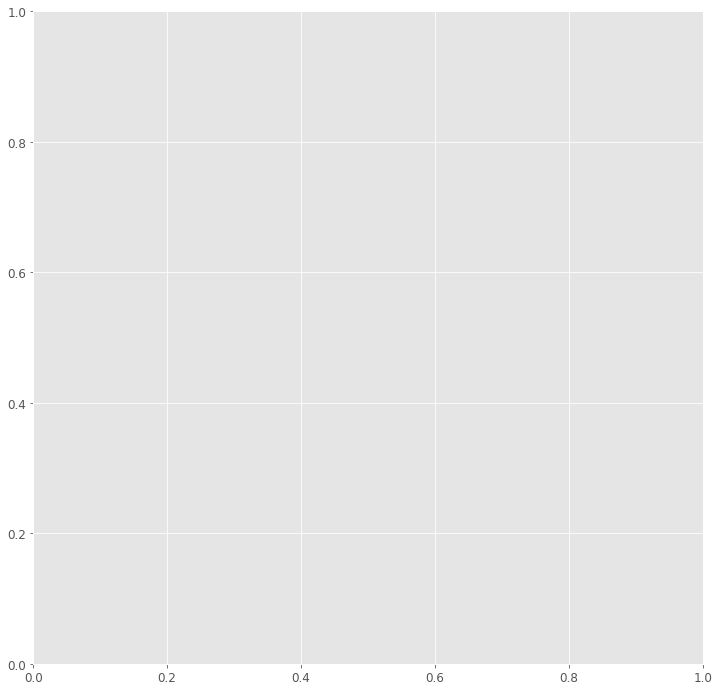

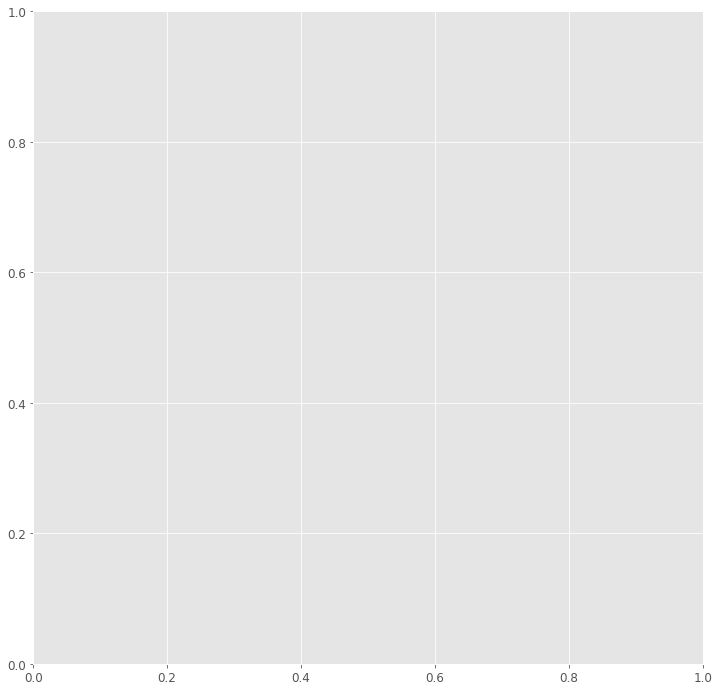

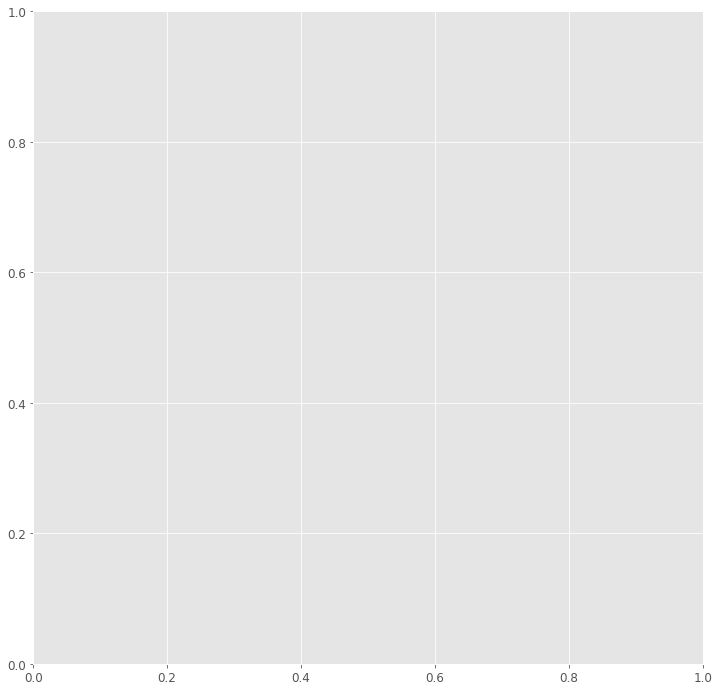

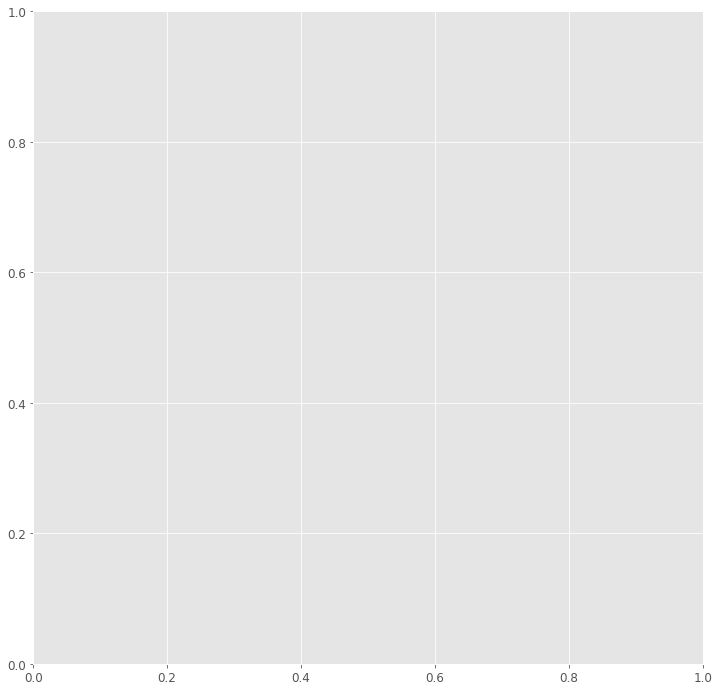

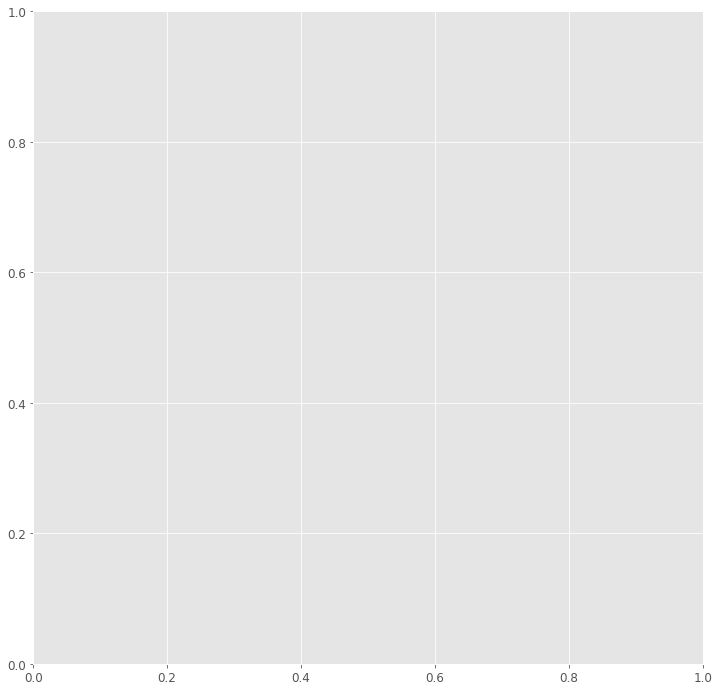

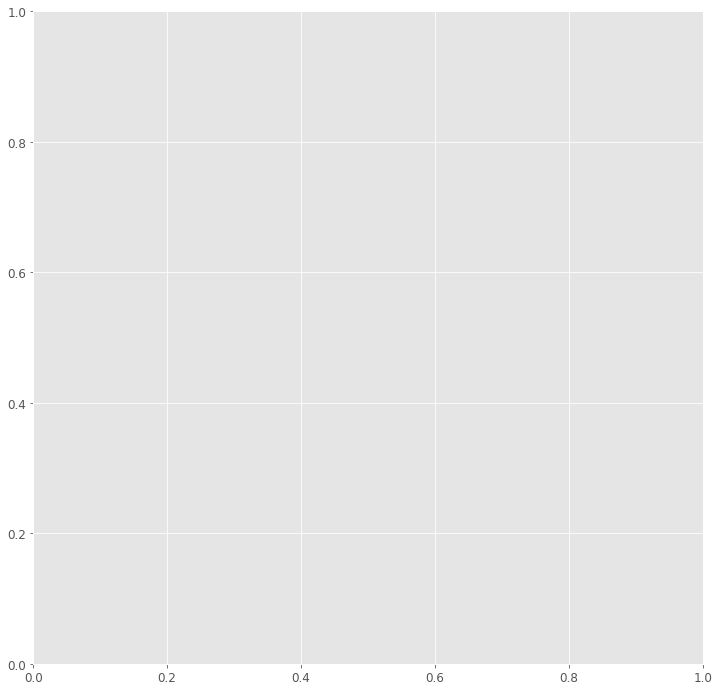

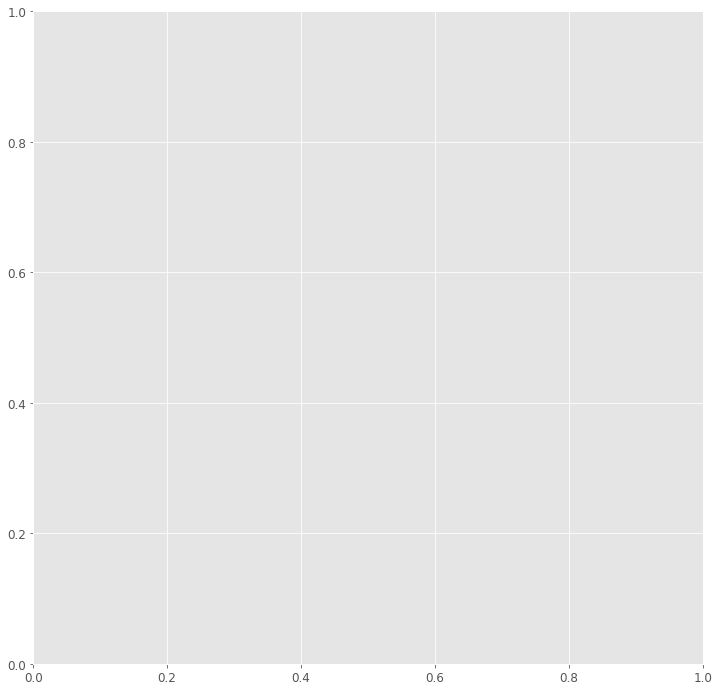

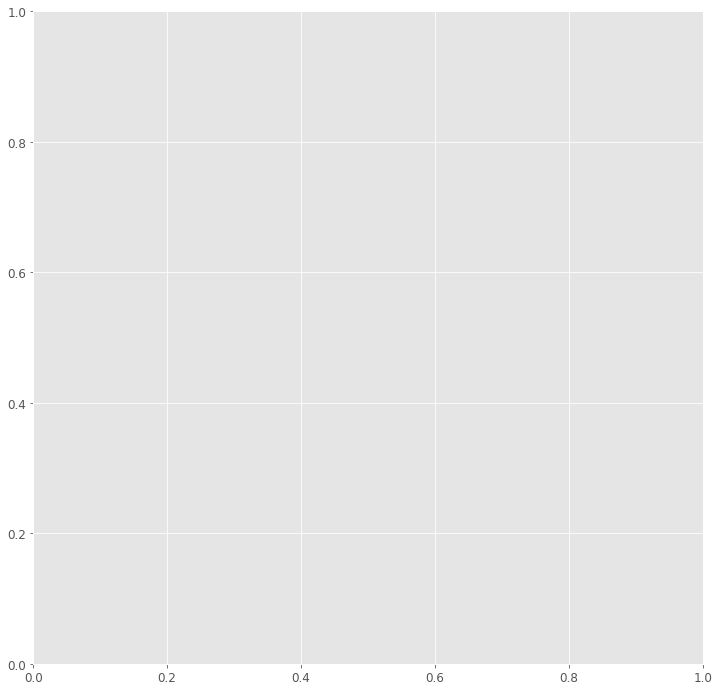

In [17]:
eps = 0.1
noise_type = "uniform"
c1 = 1e-4
c2 = 0.9
seed = 0
sig = 0.05773502691896258


for i in range(len(adapt_functions)):
    test_problem_name = adapt_functions[i]
    try: 
        print(i)
        print(test_problem_name)
        our_method = load_opt("OurMethod", test_problem_name, eps, noise_type, c1, c2, seed)
        adapt_fd = load_opt("AdaptFD", test_problem_name, sig, noise_type, c1, c2, seed)

    #         plt.plot(our_method[:, 2], our_method[:, 3], label="our method")
    #         plt.plot(adapt_fd[:, 2], adapt_fd[:, 3], label="adapt_fd")
    #         plt.legend()
    #         plt.show()

        # create figure and axis objects with subplots()
        fig,ax = plt.subplots()
        # make a plot
    #         ax.plot(gapminder_us.year, gapminder_us.lifeExp, color="red", marker="o")
        ax.plot(our_method[:, 2], our_method[:, 3], label="our method")
        ax.plot(adapt_fd[:, 2], adapt_fd[:, 3], label="adapt_fd")
        # set x-axis label
        ax.set_xlabel("func call",fontsize=14)
        # set y-axis label
        ax.set_ylabel("gradient diff",color="red",fontsize=14)
        ax.set_ylim(np.min(adapt_fd[:, 3]) - 10, np.max(adapt_fd[:, 3])* 10)
        ax.legend(loc=2)


        # twin object for two different y-axis on the sample plot
        ax2=ax.twinx()
        # make a plot with different y-axis using second axis object
    #         ax2.plot(gapminder_us.year, gapminder_us["gdpPercap"],color="blue",marker="o")
        ax2.plot(our_method[:, 2], our_method[:, 0], label="our method loss", c="darkred")
        ax2.plot(adapt_fd[:, 2], adapt_fd[:, 0], label="adapt_fd loss", c="darkblue")
        ax2.set_ylabel("loss",color="blue",fontsize=14)
        ax2.legend()
        plt.show()

    except:
        print("Not found results for {}.".format(test_problem_name))
    

In [23]:
os.path.exists("../exact_sampling")

True

In [33]:
our_method[:, 0]

array([23.02792472,  6.35593738,  2.33355927,  2.16505364,  2.21678628,
        2.27237514,  2.06189131,  1.19375527,  1.07133966,  1.09062336,
        1.05413674,  1.10352018,  1.10567024,  1.15930948,  1.21601436,
        1.22396579,  1.20893229,  1.23452884,  1.25420496,  1.22062545,
        1.23993819,  1.17311062,  1.26757698,  1.20578513,  1.23289423,
        1.21799881,  1.21972034,  1.26975399,  1.19875436,  1.22471273,
        1.2016298 ,  1.20292809,  1.27680781,  1.20963321,  1.23417871,
        1.2878342 ,  1.23919149,  1.28620616,  1.31863147,  1.2773343 ,
        1.28544912,  1.29365159,  1.29918729,  1.36862415,  1.28848347,
        1.24196794,  1.29824633,  1.33700814,  1.34975427,  1.35877376,
        1.39782266])

In [11]:
N = 5
jrandom_key = jrandom.PRNGKey(0)
jrandom_key, subkey = jrandom.split(jrandom_key)
A = jrandom.normal(subkey, shape=(N, N))
_, A = jnp.linalg.eig(A + A.T)
A = jnp.real(A)**2

In [ ]:
sig = 0.1

